In [64]:
import pandas as pd
import numpy as np
import os
import sys

# Get the path of the current directory
current_dir = os.getcwd()

# Get the parent directory (because current directory is example_notebook)
parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))

# Add the parent directory to sys.path
sys.path.append(parent_dir)


In [65]:
from SynPiper import SynPiper
from synthetic_evaluation import *

In [66]:
df = pd.read_csv(os.path.join(parent_dir, 'datasets', 'heartprocessed.csv'))

In [67]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [68]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

It is important to ensure that there are no missing values before fitting the training data into the synthesizer model.

# Parameter Processing

The following are required parameters that are used to construct a CTGAN Synthesizer.

1) categorical_attributes : List of categorical / discrete column names. 
2) epochs : The number of iterations to train the model on. The minimum number of epochs for a suitable model is 300. For a good starting point, try 500 epochs. Increasing the number of epochs helps up until a certain inflection point. After this, there is no significant improvement.

In [69]:
# Selecting categorical columns
cat_cols = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal", "target"]
num_cols = [col for col in df.columns if col not in cat_cols]

In [70]:
# Mandatory parameter dictionary for DP Synthesizer
param_dict = {
    "categorical_attributes" : cat_cols,
    "epochs": 850
}

# Choice of Synthesizer
synthesizer_name = "ctgan"

# Path of data file
data_path = os.path.join(parent_dir, 'datasets', 'heartprocessed.csv')

# Save synthetic data to current working directory as 'synthetic.csv'
synthetic_filepath = os.path.join(os.getcwd(), 'synthetic.csv')

The path of both the input data and synthetic filepath has to be specified. For simplicity, we will be saving the synthetic data into the current working directory as 'synthetic.csv'.

# Generation

In [71]:
synthesizer = SynPiper(data_path = data_path, 
                       synthesizer_name = synthesizer_name, 
                       param_dict = param_dict,
                       synthetic_filepath = synthetic_filepath)

Initialising SDV Processor
Processor initialised!


In [72]:
# Number of rows to generate
num_tuples_to_generate = 300

# Start generation
synthesizer.generate(num_tuples_to_generate = num_tuples_to_generate)

Processing input data...
Starting Generator Training


Epoch 1, Loss G:  1.0535,Loss D: -0.0477
Epoch 2, Loss G:  1.0138,Loss D: -0.0201
Epoch 3, Loss G:  1.0189,Loss D: -0.0214
Epoch 4, Loss G:  0.9960,Loss D: -0.0431
Epoch 5, Loss G:  1.0030,Loss D: -0.0582
Epoch 6, Loss G:  1.0182,Loss D: -0.0527
Epoch 7, Loss G:  1.0421,Loss D: -0.0806
Epoch 8, Loss G:  1.0057,Loss D: -0.0694
Epoch 9, Loss G:  1.0531,Loss D: -0.1247
Epoch 10, Loss G:  0.9749,Loss D: -0.1517
Epoch 11, Loss G:  1.0337,Loss D: -0.2351
Epoch 12, Loss G:  1.0346,Loss D: -0.2297
Epoch 13, Loss G:  0.9650,Loss D: -0.2241
Epoch 14, Loss G:  1.0447,Loss D: -0.2380
Epoch 15, Loss G:  1.0102,Loss D: -0.2298
Epoch 16, Loss G:  0.9036,Loss D: -0.2251
Epoch 17, Loss G:  0.9544,Loss D: -0.2584
Epoch 18, Loss G:  0.8178,Loss D: -0.2207
Epoch 19, Loss G:  0.8440,Loss D: -0.1931
Epoch 20, Loss G:  0.7140,Loss D: -0.1792
Epoch 21, Loss G:  0.7307,Loss D: -0.1061
Epoch 22, Loss G:  0.6433,Loss D: -0.1560
Epoch 23, Loss G:  0.5576,Loss D: -0.1322
Epoch 24, Loss G:  0.5962,Loss D: -0.1256
E

In this instance, we decided to generate 300 rows of sampled data. As the number of epochs increase, we can observe that the generator loss had decreased while the discriminator loss has rather remained stagnant. This is due to the min-max optimisation by the generator and discriminator.

The discriminator seeks to maximize the *average of the log probability* for real data and the *log of the inverted probabilities* of fake data. 
The generator seeks to minimize the log of the inverse probability predicted by the discriminator for fake data.

When the generator loss is minimized, this means that the discriminator has a harder time distinguishing data from the generator and the training data. The discriminator will eventually converge as it can no longer effectively distinguish between real and fake data. 

In [73]:
df_syn = synthesizer.generated_samples

df_syn

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,73,1,4,125,244,0,0,131,0,0.9,1,3,7,1
1,56,0,2,100,126,1,0,202,0,0.0,1,0,3,0
2,61,1,4,106,207,0,2,144,0,0.0,2,0,3,1
3,53,1,4,125,126,0,2,158,1,0.0,3,1,6,1
4,77,0,3,120,286,0,0,145,0,0.1,3,1,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,64,1,4,155,177,0,0,166,0,0.4,2,1,3,1
296,54,1,3,94,284,1,0,148,0,0.0,2,0,3,1
297,56,1,4,109,245,0,2,104,1,0.1,2,0,7,1
298,77,0,3,150,126,0,0,176,0,1.7,1,0,3,0


# Evaluation

In [74]:
tvd_table, tvd_figure = get_all_variational_differences(real_table= df, 
                                                    synthetic_table= df_syn, 
                                                    categorical_columns= cat_cols)

tvd_table

,categorical_columns,tvd_scores
0,sex,0.973434
1,cp,0.876431
2,fbs,0.981886
3,restecg,0.964916
4,exang,0.973266
5,slope,0.848653
6,ca,0.872862
7,thal,0.841145
8,target,0.897946


In [75]:
tvd_figure

From the table and the chart, we can see that most categorical columns from the synthetic data had a very high similarity score to its real data counterpart. This is a sign of high fidelity - the synthetic data resemebles the distribution of its original data.

In [76]:
ks_table, ks_figure = get_all_ks_scores(real_table = df,
                                        synthetic_table = df_syn,
                                        numerical_columns = num_cols)

In [77]:
ks_table

,numerical_columns,ks_scores
0,age,0.567239
1,trestbps,0.755556
2,chol,0.520438
3,thalach,0.740606
4,oldpeak,0.941044


In [78]:
ks_figure

From the figure and table, we can see that the distribution of the numerical columns did not retain as well as the categorical columns. To possibly further increase the fidelity of numerical columns, you may consider increasing the number of epochs to train the synthesizer on.

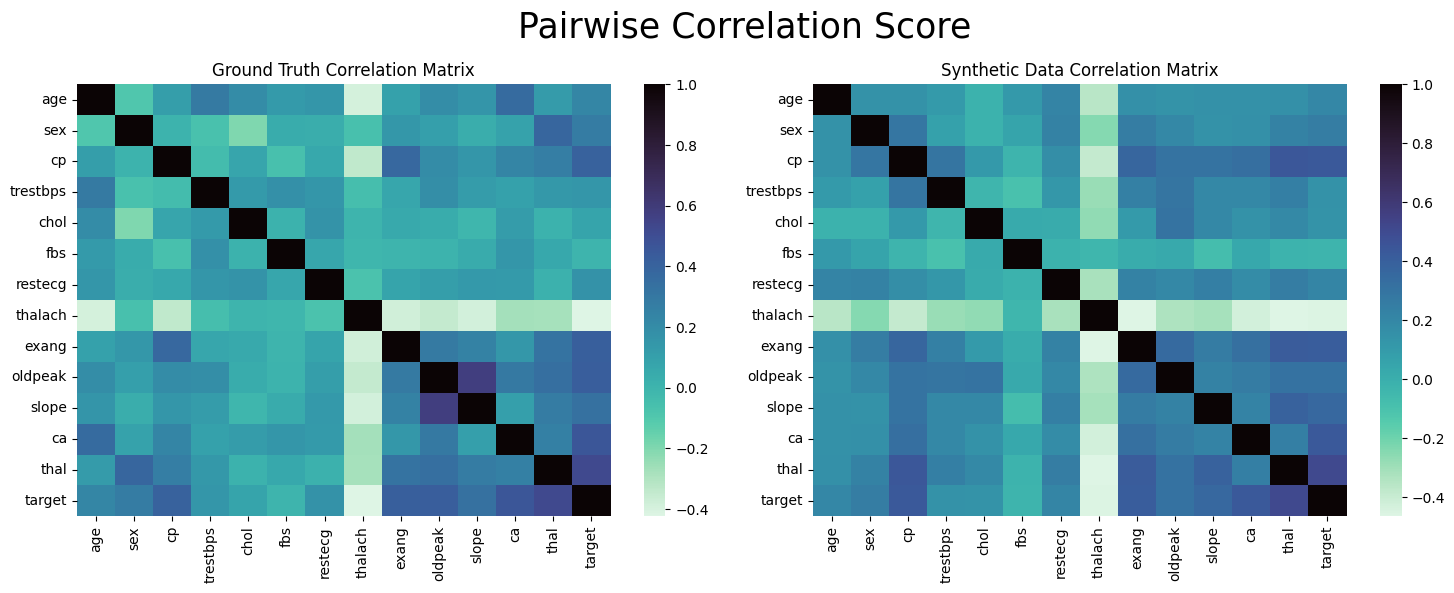

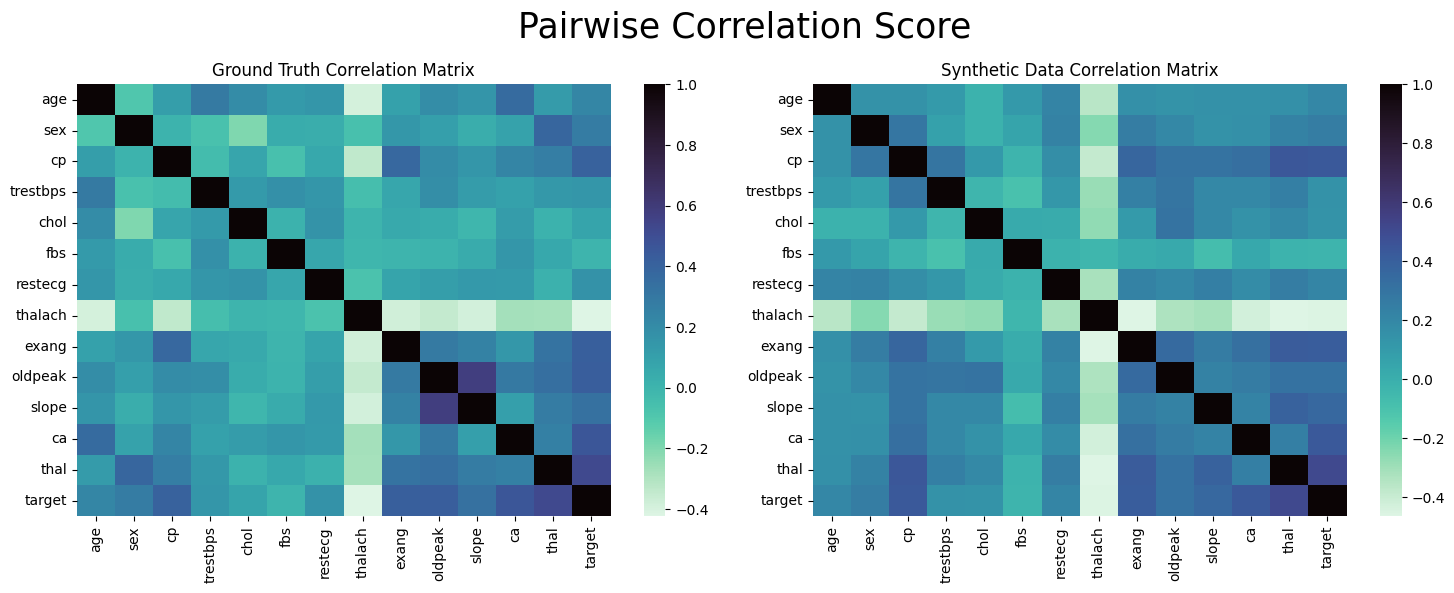

In [79]:
plot_corr_matrix(real = df,
                synthetic = df_syn)


For high fidelity (similarity) synthetic data, we would expect the correlations between variables to be retained.

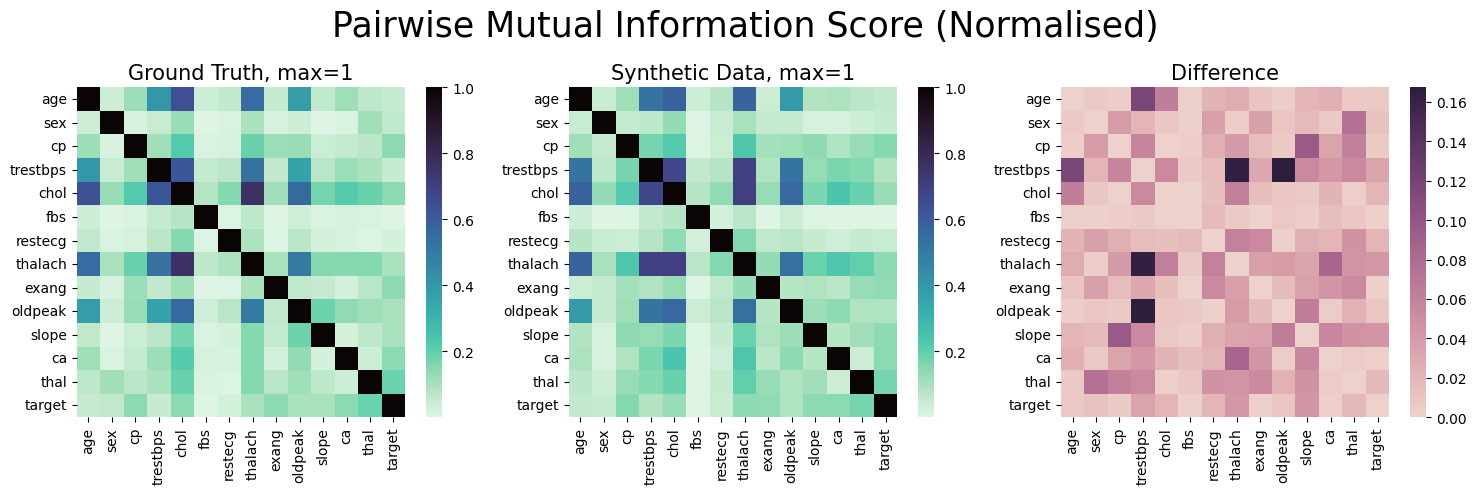

In [80]:
fig, mi_score, pairwise_passed = plot_mi_matrix(df = df, df_syn = df_syn)

A more accurate way of validating the retention of the dependencies between 2 variables is to look at Mutual Information. This applies to both discrete and continuous data and does not require the variables to have linear relationships. From the chart above, we can see that the pairwise mutual information has generally been retained in most columns. However, pairwise mutual information between numerical columns like `trestbps` and `age` have suffered a larger difference. This could be due to the lack of retention of the distributions of these columns as seen from the KS Scores.

In [81]:
print(f"Amount of Mutual Information Retained = {mi_score}%")

Amount of Mutual Information Retained = 97.04%


In [82]:
print(f"Proportion of Pair-wise relationships that retained Mutual Information = {pairwise_passed}%")

Proportion of Pair-wise relationships that retained Mutual Information = 97.8%


In [83]:
for colname in df.columns:
    fig = plot_real_synthetic(df, df_syn, colname)
    fig.show()

In [84]:
# Mandatory parameter dictionary for DP Synthesizer
param_dict = {
    "categorical_attributes" : cat_cols,
    "epochs": 850
}

# Choice of Synthesizer
synthesizer_name = "tvae"

# Path of data file
data_path = os.path.join(parent_dir, 'datasets', 'heartprocessed.csv')

# Save synthetic data to current working directory as 'synthetic.csv'
synthetic_filepath = os.path.join(os.getcwd(), 'synthetic.csv')

In [85]:
synthesizer_tvae = SynPiper(data_path = data_path, 
                       synthesizer_name = synthesizer_name, 
                       param_dict = param_dict,
                       synthetic_filepath = synthetic_filepath)

Initialising SDV Processor
Processor initialised!


In [86]:
num_tuples_to_generate = 300

synthesizer_tvae.generate(num_tuples_to_generate = num_tuples_to_generate)

Processing input data...
Starting Generator Training
Generator Training Completed, Generating 300 of data
Successfully saved the synthetic dataset to c:\Users\User\Desktop\SynPiper\example_notebooks\synthetic.csv


In [106]:
df_syn = synthesizer_tvae.generated_samples

df_syn

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,55,1,3,129,303,0,2,152,0,0.2,2,1,3,0
1,64,1,3,136,275,0,0,167,0,0.5,1,0,3,0
2,54,1,4,147,262,0,2,148,0,0.6,2,1,7,1
3,61,1,4,132,248,0,2,147,0,0.0,1,1,7,1
4,58,1,3,130,217,0,2,150,0,1.6,2,2,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,55,1,4,119,182,0,2,111,1,1.7,2,0,7,1
296,45,1,3,124,310,0,0,180,0,0.0,1,0,3,0
297,51,1,4,143,202,0,2,167,0,0.2,1,0,3,0
298,61,1,1,115,170,0,0,168,0,1.0,2,0,7,1


In [107]:
ks_table, ks_figure = get_all_ks_scores(real_table = df,
                                        synthetic_table = df_syn,
                                        numerical_columns = num_cols)

In [108]:
ks_table

,numerical_columns,ks_scores
0,age,0.926128
1,trestbps,0.879697
2,chol,0.920471
3,thalach,0.926162
4,oldpeak,0.870101


In [109]:
ks_figure

In [110]:
tvd_table, tvd_figure = get_all_variational_differences(real_table= df, 
                                                    synthetic_table= df_syn, 
                                                    categorical_columns= cat_cols)

In [111]:
tvd_table

,categorical_columns,tvd_scores
0,sex,0.916768
1,cp,0.848114
2,fbs,0.865219
3,restecg,0.958249
4,exang,0.963266
5,slope,0.861279
6,ca,0.932525
7,thal,0.920539
8,target,0.941279


In [112]:
tvd_figure

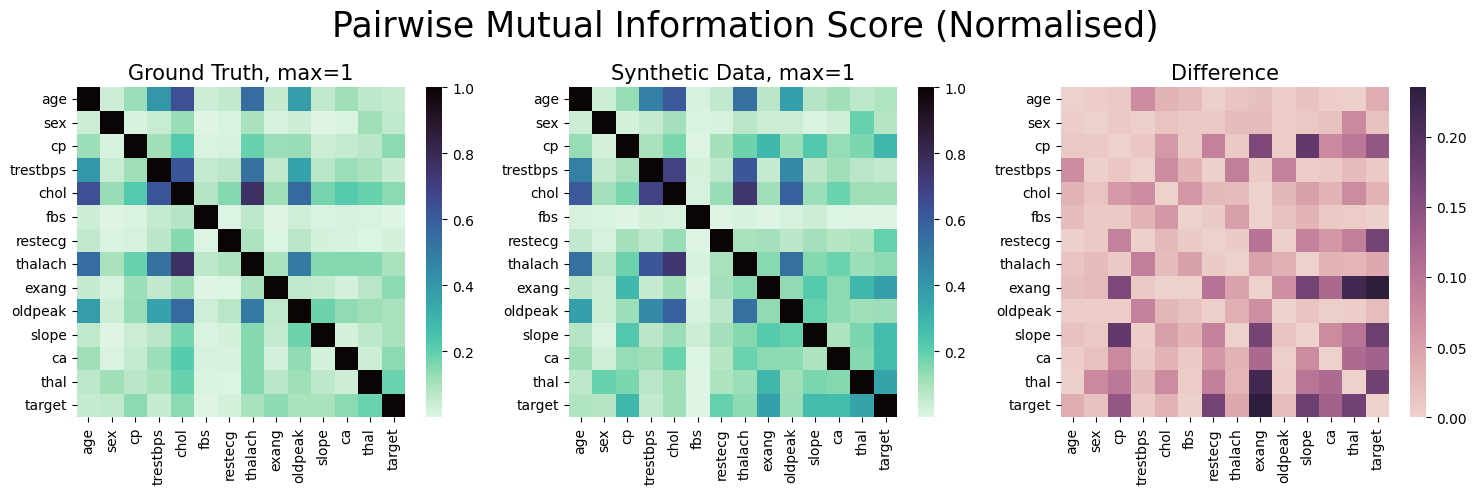

In [113]:
fig, mi_score, pairwise_passed = plot_mi_matrix(df = df, df_syn = df_syn)

In [114]:
print(f"Amount of Mutual Information Retained = {mi_score}%")

Amount of Mutual Information Retained = 95.19%


In [115]:
print(f"Proportion of Pair-wise relationships that retained Mutual Information = {pairwise_passed}%")

Proportion of Pair-wise relationships that retained Mutual Information = 91.21000000000001%


In [116]:
for colname in df.columns:
    fig = plot_real_synthetic(df, df_syn, colname)
    fig.show()